In [7]:
import pandas as pd
import datetime as dt 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

In [9]:
df = pd.read_csv('tortilla_prices.csv')
df

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40


In [10]:
df_jalisco = df[df['State'] == 'Jalisco']
combinations = df_jalisco[['City', 'Store type']].drop_duplicates()

dfs = {}

for index, row in combinations.iterrows():
    city = row['City']
    store_type = row['Store type']
    
    df_filtered = df_jalisco[(df_jalisco['City'] == city) & (df_jalisco['Store type'] == store_type)]
    
    df_filtered = df_filtered.groupby(['Year', 'Month']).agg({
        'Price per kilogram': 'mean'
    }).reset_index()

    df_filtered['Date'] = pd.to_datetime(df_filtered['Year'].astype(str) + '-' + df_filtered['Month'].astype(str) + '-01')
    df_filtered.set_index('Date', inplace=True)
    df_filtered.drop(columns=['Year', 'Month'], inplace=True)

    df_name = f"{city.replace(' ', '_')}_{store_type.replace(' ', '_')}"
    
    dfs[df_name] = df_filtered

In [11]:
for df_name, df_filtered in dfs.items():
    df_filtered.fillna(method='ffill', inplace=True)
    df_filtered.fillna(method='bfill', inplace=True)

C:\Users\esteb\AppData\Local\Temp\ipykernel_18956\2274903202.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_18956\2274903202.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='bfill', inplace=True)


In [12]:
data = dfs["Guadalajara_Mom_and_Pop_Store"]

In [13]:
data

,Price per kilogram
Date,
2007-01-01,9.042353
2007-02-01,8.519130
2007-03-01,8.512308
2007-04-01,8.523636
2007-05-01,8.534783
...,...
2024-03-01,24.850000
2024-04-01,24.864615
2024-05-01,24.830833


In [14]:
df = pd.DataFrame({"ds":data.index, "y":data["Price per kilogram"], "unique_id": "Tortilla"})
df.head()

,ds,y,unique_id
Date,,,
2007-01-01,2007-01-01,9.042353,Tortilla
2007-02-01,2007-02-01,8.519130,Tortilla
2007-03-01,2007-03-01,8.512308,Tortilla
2007-04-01,2007-04-01,8.523636,Tortilla
2007-05-01,2007-05-01,8.534783,Tortilla


c:\Users\esteb\.conda\envs\LAB\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


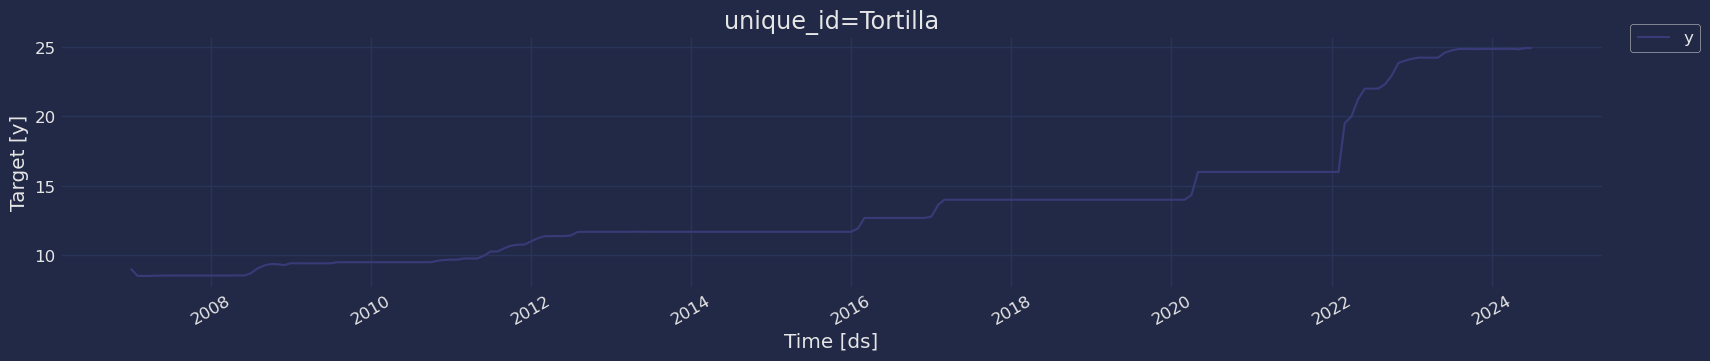

In [15]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

Como vemos que la serie crece en los ultimos periodos pero parece que se va a suavizar creo que podriamos tener una tendecian aditiva suavizada(Ad)  
Como observamos que la serie no cuenta con una estacionalidad clara la prodria mos dejar sin estacionalidad (N)


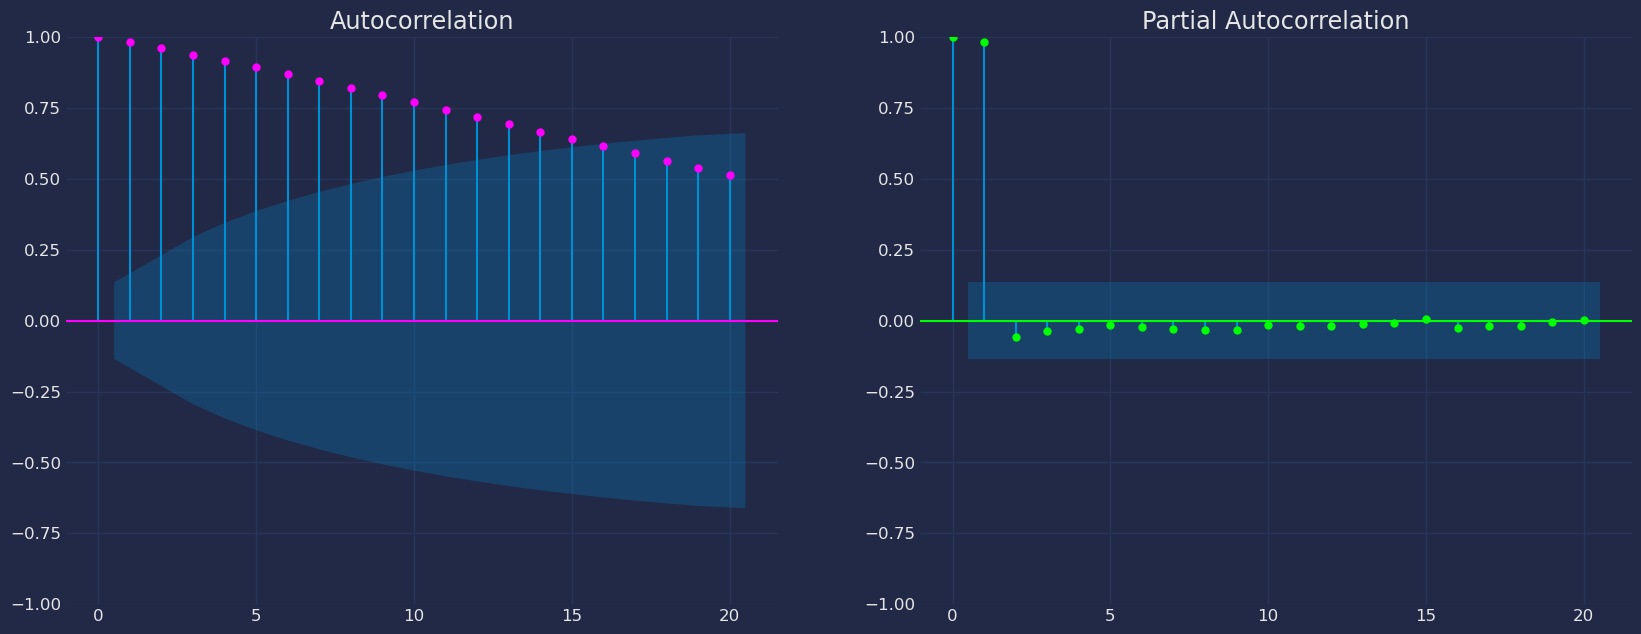

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=20, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Plot
plot_pacf(df["y"],  lags=20, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();


Vemos como los resagos son practicamente irrelenaves salvo el inmediatamente anterior 

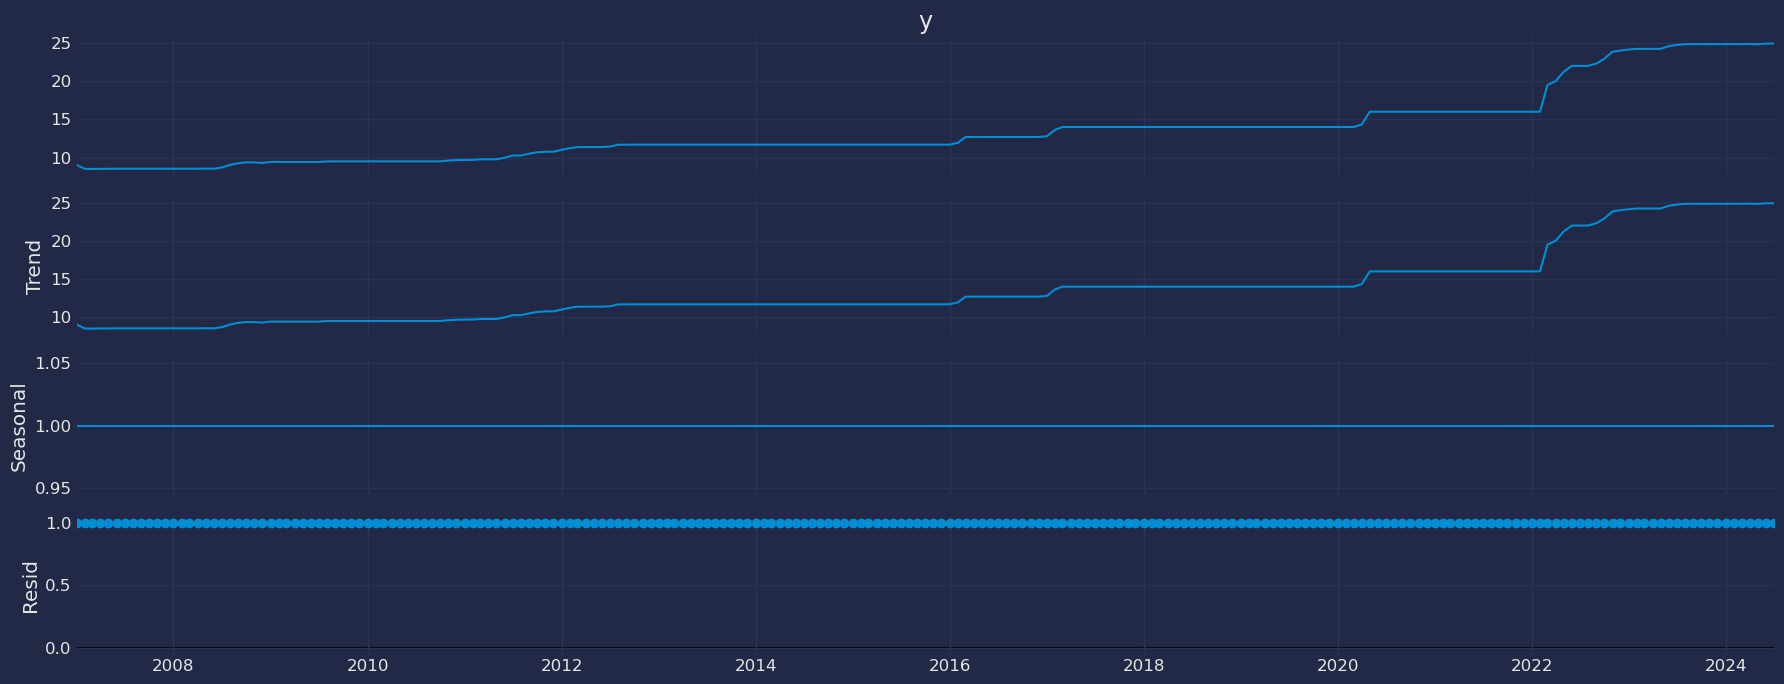

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["y"], model = "mul", period=1)
a.plot();

In [18]:
train = df.iloc[:192]
test = df.iloc[192:]
print(len(train), len(test))    
horizon = len(test)

192 19


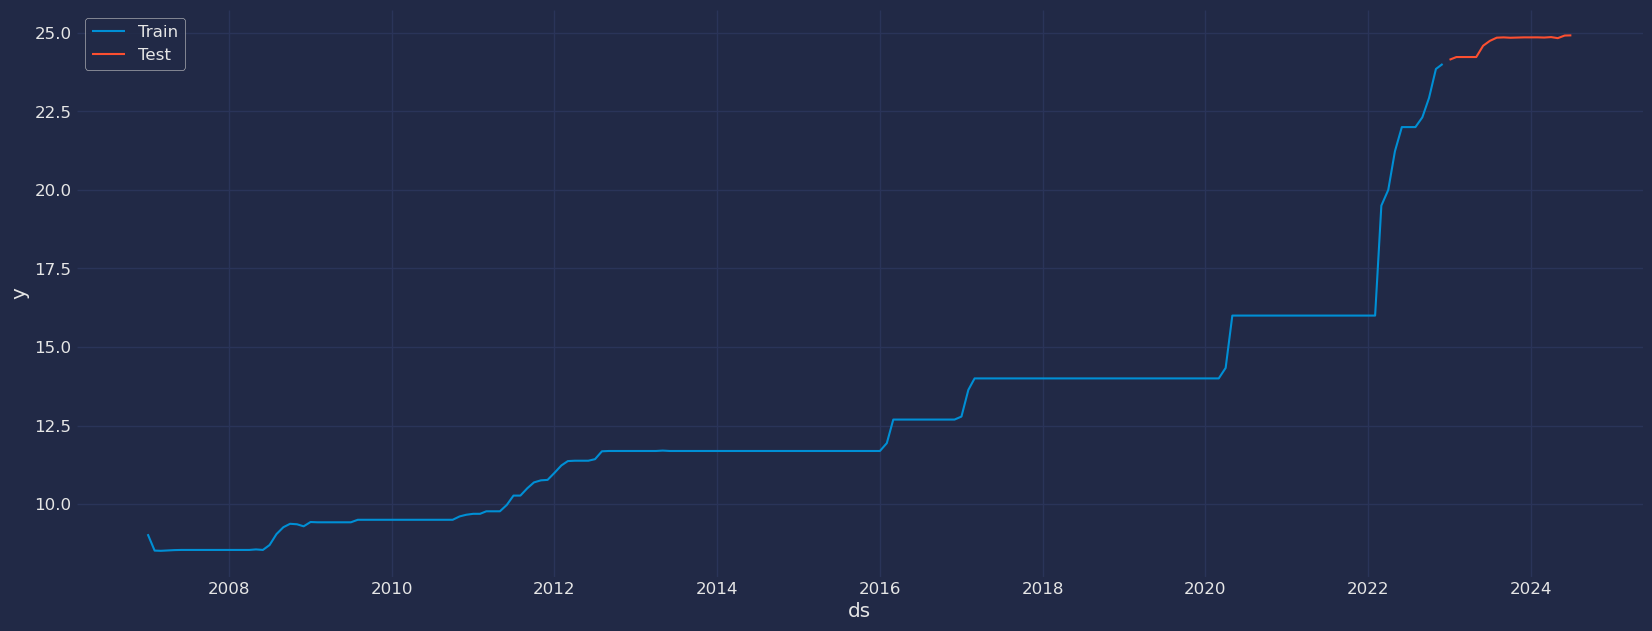

In [19]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.show()

In [20]:
from statsforecast.models import AutoETS
autoets = AutoETS(model=["M","A","N"], damped=True, alias="AutoETS", season_length=1)

In [21]:
autoets = autoets.fit(df["y"].values)
autoets

AutoETS

In [22]:
y_hat_dict = autoets.predict(h=horizon)
y_hat_dict

{'mean': array([24.92822921, 24.93645785, 24.94304077, 24.94830711, 24.95252018,
        24.95589063, 24.958587  , 24.96074409, 24.96246976, 24.9638503 ,
        24.96495473, 24.96583828, 24.96654511, 24.96711058, 24.96756295,
        24.96792485, 24.96821437, 24.96844599, 24.96863128])}

In [23]:
test.head()

,ds,y,unique_id
Date,,,
2023-01-01,2023-01-01,24.143077,Tortilla
2023-02-01,2023-02-01,24.230000,Tortilla
2023-03-01,2023-03-01,24.230000,Tortilla
2023-04-01,2023-04-01,24.230000,Tortilla
2023-05-01,2023-05-01,24.230000,Tortilla


In [24]:
forecast=pd.Series(pd.date_range("2023-01-01", freq="MS", periods=horizon))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=y_hat_dict.get("mean")
forecast["unique_id"]="1"
forecast


,ds,hat,unique_id
0,2023-01-01,24.928229,1
1,2023-02-01,24.936458,1
2,2023-03-01,24.943041,1
3,2023-04-01,24.948307,1
4,2023-05-01,24.952520,1
5,2023-06-01,24.955891,1
6,2023-07-01,24.958587,1
7,2023-08-01,24.960744,1
8,2023-09-01,24.962470,1
9,2023-10-01,24.963850,1


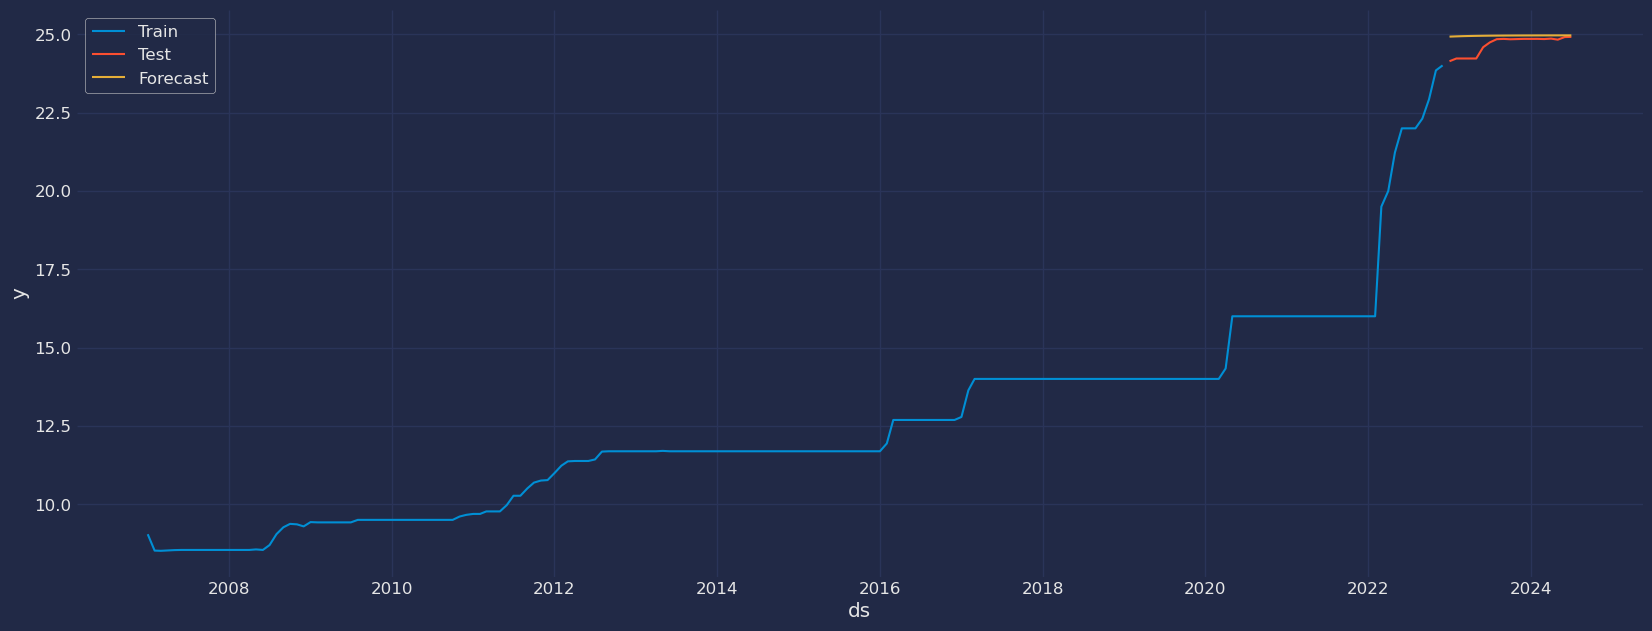

In [25]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()


In [26]:
y_hat_dict = autoets.predict(h=horizon, level=[80,90,95])
y_hat_dict

{'mean': array([24.92822921, 24.93645785, 24.94304077, 24.94830711, 24.95252018,
        24.95589063, 24.958587  , 24.96074409, 24.96246976, 24.9638503 ,
        24.96495473, 24.96583828, 24.96654511, 24.96711058, 24.96756295,
        24.96792485, 24.96821437, 24.96844599, 24.96863128]),
 'lo-95': array([23.94739983, 23.43394768, 22.97934683, 22.5565564 , 22.15739056,
        21.77825222, 21.41703127, 21.07218352, 20.74241611, 20.42657328,
        20.12359414, 19.83249716, 19.55237399, 19.2823862 , 19.02176249,
        18.76979552, 18.52583828, 18.28930014, 18.05964273]),
 'lo-90': array([24.10509125, 23.67551157, 23.29505687, 22.94108664, 22.60677346,
        22.28913241, 21.98641974, 21.69736119, 21.4208891 , 21.15604739,
        20.90195685, 20.65780261, 20.42282947, 20.19633949, 19.97768991,
        19.76629075, 19.56160192, 19.3631301 , 19.17042531]),
 'lo-80': array([24.28689935, 23.95401926, 23.65905032, 23.38442538, 23.12488316,
        22.87814455, 22.64288818, 22.418151  , 22

In [27]:
forecast["hat"]=y_hat_dict.get("mean")

forecast["lo-80"]=y_hat_dict.get("lo-80")
forecast["hi-80"]=y_hat_dict.get("hi-80")

forecast["lo-90"]=y_hat_dict.get("lo-80")
forecast["hi-90"]=y_hat_dict.get("hi-80")

forecast["lo-95"]=y_hat_dict.get("lo-95")
forecast["hi-95"]=y_hat_dict.get("hi-95")
forecast


,ds,hat,unique_id,lo-80,hi-80,lo-90,hi-90,lo-95,hi-95
0,2023-01-01,24.928229,1,24.286899,25.569559,24.286899,25.569559,23.947400,25.909059
1,2023-02-01,24.936458,1,23.954019,25.918896,23.954019,25.918896,23.433948,26.438968
2,2023-03-01,24.943041,1,23.659050,26.227031,23.659050,26.227031,22.979347,26.906735
3,2023-04-01,24.948307,1,23.384425,26.512189,23.384425,26.512189,22.556556,27.340058
4,2023-05-01,24.952520,1,23.124883,26.780157,23.124883,26.780157,22.157391,27.747650
5,2023-06-01,24.955891,1,22.878145,27.033637,22.878145,27.033637,21.778252,28.133529
6,2023-07-01,24.958587,1,22.642888,27.274286,22.642888,27.274286,21.417031,28.500143
7,2023-08-01,24.960744,1,22.418151,27.503337,22.418151,27.503337,21.072184,28.849305
8,2023-09-01,24.962470,1,22.203125,27.721815,22.203125,27.721815,20.742416,29.182523
9,2023-10-01,24.963850,1,21.997084,27.930616,21.997084,27.930616,20.426573,29.501127


In [28]:
df=df.set_index("ds")
forecast=forecast.set_index("ds")

In [29]:
df['unique_id'] = df['unique_id'].astype(object)
df_plot=df.merge(forecast, how='left', on=['unique_id', 'ds'])

In [30]:
df_plot = df_plot[-24:]

C:\Users\esteb\AppData\Local\Temp\ipykernel_18956\2378475230.py:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
C:\Users\esteb\AppData\Local\Temp\ipykernel_18956\2378475230.py:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")


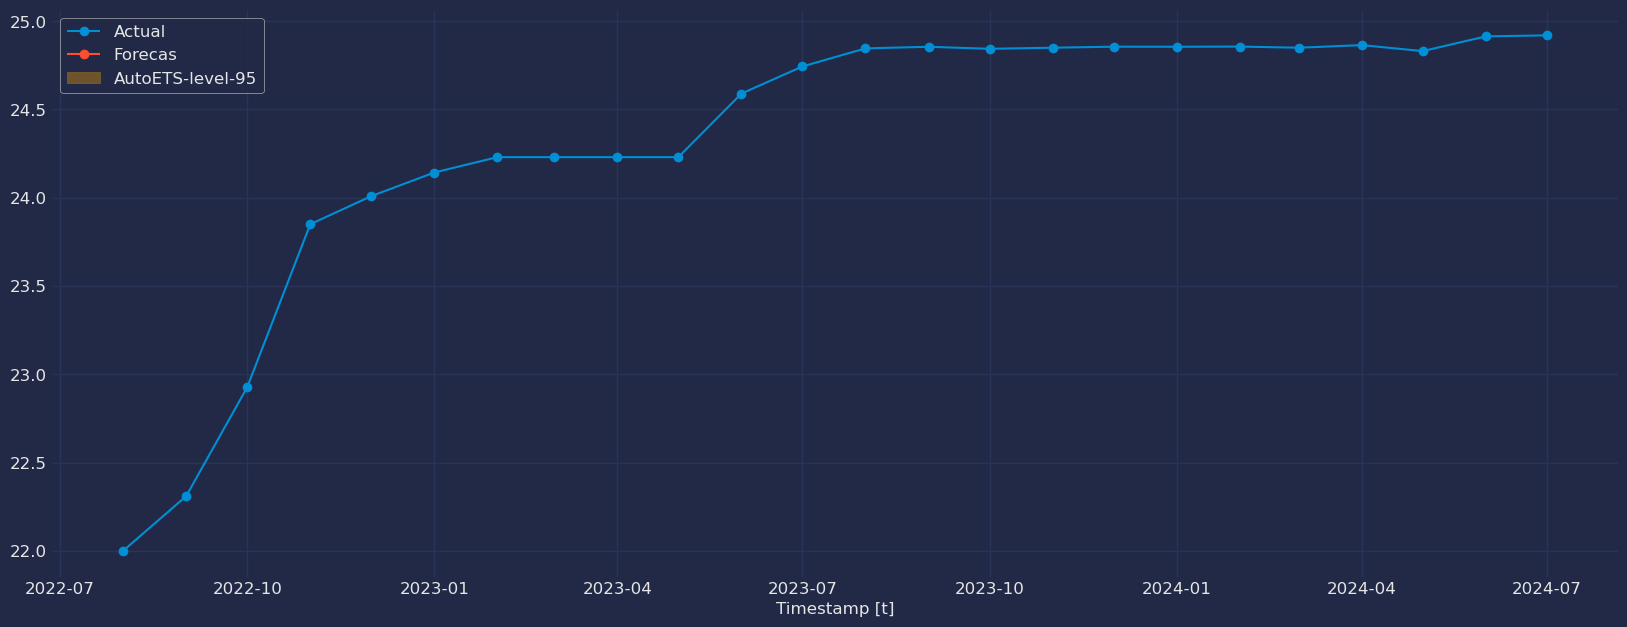

In [31]:
fig, ax = plt.subplots()
plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")
ax.fill_between(df_plot.index, 
                df_plot['lo-80'], 
                df_plot['hi-80'],
                alpha=.35,
                color='orange',
                label='AutoETS-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
plt.legend(fontsize=12)
ax.grid(True)

plt.show()

In [32]:
from sklearn import metrics

In [33]:
def model_evaluation(y_true, y_pred, model):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')


In [34]:
model_evaluation(test["y"], forecast["hat"], "AutoETS")

Model Evaluation: AutoETS
MSE is : 0.15681995331616091
MAE is : 0.288201073794819
RMSE is : 0.3960049915293504
MAPE is : 1.1810876534948602
R2 is : -0.9682658191778146
corr is : 0.9269687464800308



## ETS (ZZZ)

In [35]:
from statsforecast.models import AutoETS
autoets = AutoETS(model=["Z","Z","Z"], damped=True, alias="AutoETS", season_length=1)

In [36]:
autoets = autoets.fit(df["y"].values)
autoets

AutoETS

In [37]:
y_hat_dict = autoets.predict(h=horizon)
y_hat_dict

{'mean': array([24.92822921, 24.93645785, 24.94304077, 24.94830711, 24.95252018,
        24.95589063, 24.958587  , 24.96074409, 24.96246976, 24.9638503 ,
        24.96495473, 24.96583828, 24.96654511, 24.96711058, 24.96756295,
        24.96792485, 24.96821437, 24.96844599, 24.96863128])}

In [38]:
forecast=pd.Series(pd.date_range("2023-01-01", freq="MS", periods=horizon))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=y_hat_dict.get("mean")
forecast["unique_id"]="1"
forecast

,ds,hat,unique_id
0,2023-01-01,24.928229,1
1,2023-02-01,24.936458,1
2,2023-03-01,24.943041,1
3,2023-04-01,24.948307,1
4,2023-05-01,24.952520,1
5,2023-06-01,24.955891,1
6,2023-07-01,24.958587,1
7,2023-08-01,24.960744,1
8,2023-09-01,24.962470,1
9,2023-10-01,24.963850,1


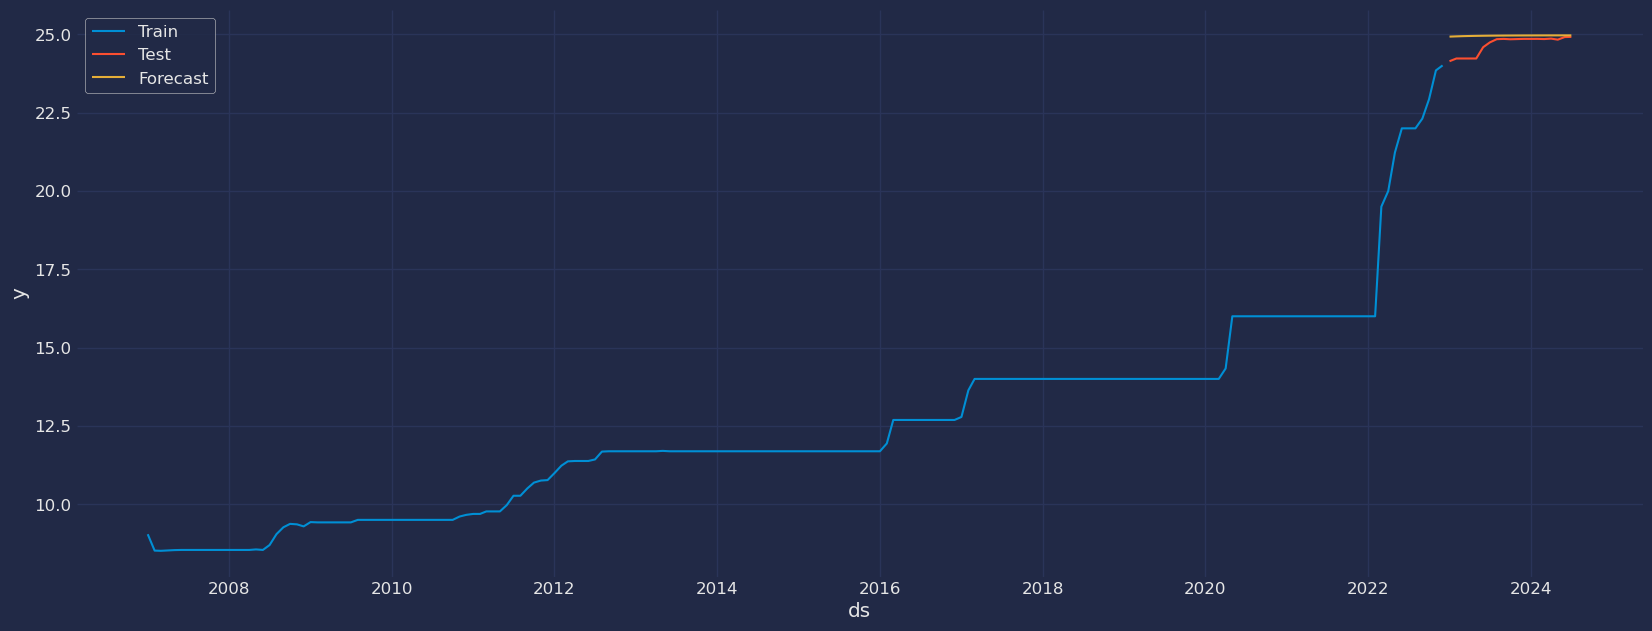

In [39]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

In [40]:
y_hat_dict = autoets.predict(h=horizon, level=[80,90,95])
y_hat_dict

{'mean': array([24.92822921, 24.93645785, 24.94304077, 24.94830711, 24.95252018,
        24.95589063, 24.958587  , 24.96074409, 24.96246976, 24.9638503 ,
        24.96495473, 24.96583828, 24.96654511, 24.96711058, 24.96756295,
        24.96792485, 24.96821437, 24.96844599, 24.96863128]),
 'lo-95': array([23.94739983, 23.43394768, 22.97934683, 22.5565564 , 22.15739056,
        21.77825222, 21.41703127, 21.07218352, 20.74241611, 20.42657328,
        20.12359414, 19.83249716, 19.55237399, 19.2823862 , 19.02176249,
        18.76979552, 18.52583828, 18.28930014, 18.05964273]),
 'lo-90': array([24.10509125, 23.67551157, 23.29505687, 22.94108664, 22.60677346,
        22.28913241, 21.98641974, 21.69736119, 21.4208891 , 21.15604739,
        20.90195685, 20.65780261, 20.42282947, 20.19633949, 19.97768991,
        19.76629075, 19.56160192, 19.3631301 , 19.17042531]),
 'lo-80': array([24.28689935, 23.95401926, 23.65905032, 23.38442538, 23.12488316,
        22.87814455, 22.64288818, 22.418151  , 22

In [41]:
forecast["hat"]=y_hat_dict.get("mean")

forecast["lo-80"]=y_hat_dict.get("lo-80")
forecast["hi-80"]=y_hat_dict.get("hi-80")

forecast["lo-90"]=y_hat_dict.get("lo-80")
forecast["hi-90"]=y_hat_dict.get("hi-80")

forecast["lo-95"]=y_hat_dict.get("lo-95")
forecast["hi-95"]=y_hat_dict.get("hi-95")
forecast

,ds,hat,unique_id,lo-80,hi-80,lo-90,hi-90,lo-95,hi-95
0,2023-01-01,24.928229,1,24.286899,25.569559,24.286899,25.569559,23.947400,25.909059
1,2023-02-01,24.936458,1,23.954019,25.918896,23.954019,25.918896,23.433948,26.438968
2,2023-03-01,24.943041,1,23.659050,26.227031,23.659050,26.227031,22.979347,26.906735
3,2023-04-01,24.948307,1,23.384425,26.512189,23.384425,26.512189,22.556556,27.340058
4,2023-05-01,24.952520,1,23.124883,26.780157,23.124883,26.780157,22.157391,27.747650
5,2023-06-01,24.955891,1,22.878145,27.033637,22.878145,27.033637,21.778252,28.133529
6,2023-07-01,24.958587,1,22.642888,27.274286,22.642888,27.274286,21.417031,28.500143
7,2023-08-01,24.960744,1,22.418151,27.503337,22.418151,27.503337,21.072184,28.849305
8,2023-09-01,24.962470,1,22.203125,27.721815,22.203125,27.721815,20.742416,29.182523
9,2023-10-01,24.963850,1,21.997084,27.930616,21.997084,27.930616,20.426573,29.501127


In [42]:
df['unique_id'] = df['unique_id'].astype(object)
df_plot=df.merge(forecast, how='left', on=['unique_id', 'ds'])

C:\Users\esteb\AppData\Local\Temp\ipykernel_18956\2378475230.py:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
C:\Users\esteb\AppData\Local\Temp\ipykernel_18956\2378475230.py:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")


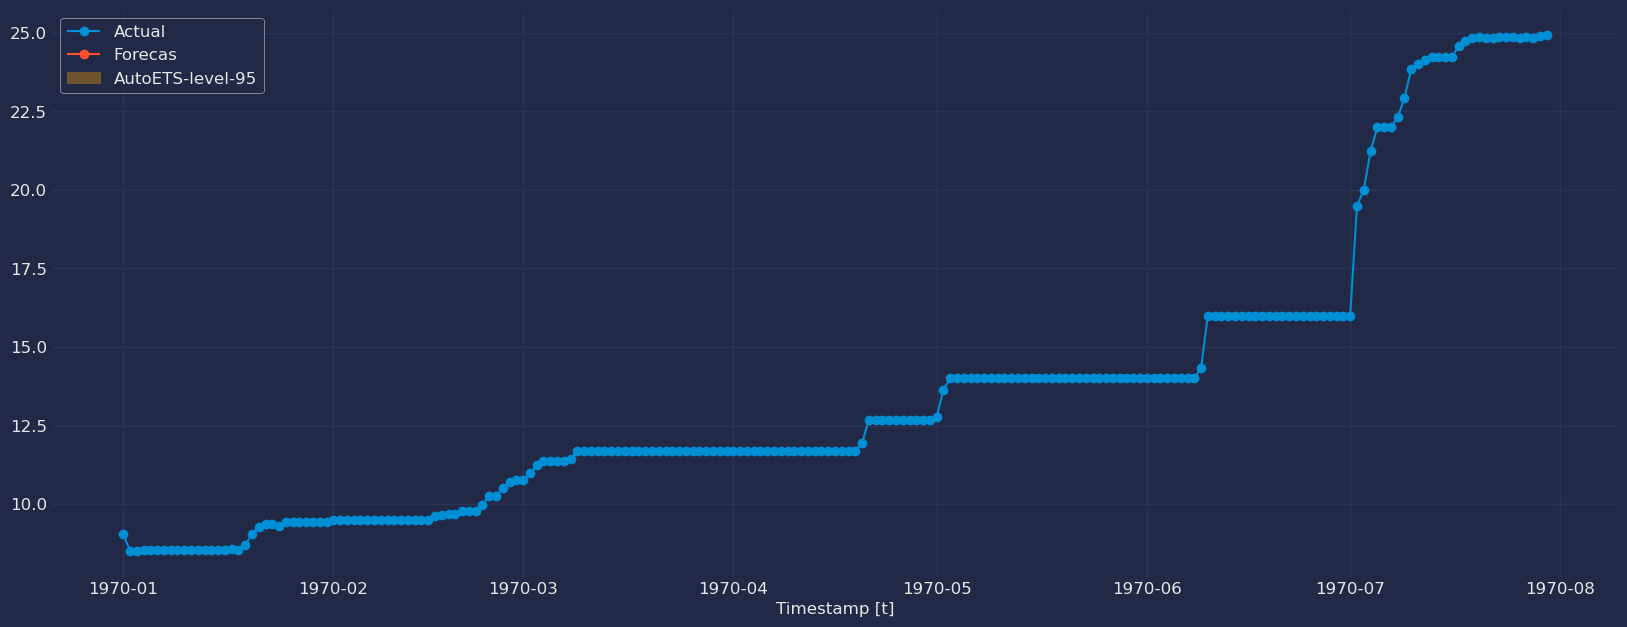

In [43]:
fig, ax = plt.subplots()
plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")
ax.fill_between(df_plot.index, 
                df_plot['lo-80'], 
                df_plot['hi-80'],
                alpha=.35,
                color='orange',
                label='AutoETS-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
plt.legend(fontsize=12)
ax.grid(True)

plt.show()

In [44]:
model_evaluation(test["y"], forecast["hat"], "AutoETS")

Model Evaluation: AutoETS
MSE is : 0.15681995331616091
MAE is : 0.288201073794819
RMSE is : 0.3960049915293504
MAPE is : 1.1810876534948602
R2 is : -0.9682658191778146
corr is : 0.9269687464800308



Con el ETS en ZZZ confimamos que en efecto el mejor modelo parece ser el que usa errores multiplicativos, tendencia aditiva y sin estacionalidad 

## **Arima**

In [49]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


In [55]:
df = data
df

,Price per kilogram,unique_id
Date,,
2007-01-01,9.042353,1
2007-02-01,8.519130,1
2007-03-01,8.512308,1
2007-04-01,8.523636,1
2007-05-01,8.534783,1
...,...,...
2024-03-01,24.850000,1
2024-04-01,24.864615,1
2024-05-01,24.830833,1


In [57]:
df = df.reset_index()
df

,Date,Price per kilogram,unique_id
0,2007-01-01,9.042353,1
1,2007-02-01,8.519130,1
2,2007-03-01,8.512308,1
3,2007-04-01,8.523636,1
4,2007-05-01,8.534783,1
...,...,...,...
206,2024-03-01,24.850000,1
207,2024-04-01,24.864615,1
208,2024-05-01,24.830833,1
209,2024-06-01,24.914167,1


In [58]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()


,ds,y,unique_id
0,2007-01-01,9.042353,1
1,2007-02-01,8.519130,1
2,2007-03-01,8.512308,1
3,2007-04-01,8.523636,1
4,2007-05-01,8.534783,1


In [ ]:
print(df.dtypes)

ds           datetime64[ns]
y                   float64
unique_id            object
dtype: object


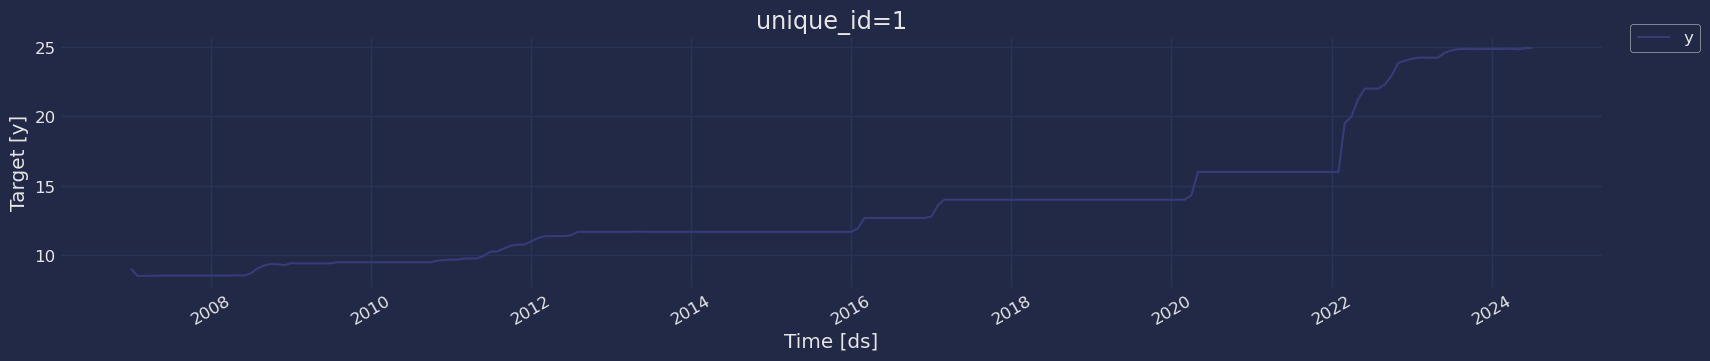

In [61]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

count    211.000000
mean      13.588347
std        4.635003
min        8.512308
25%        9.871538
50%       11.690000
75%       14.000000
max       24.920000
Name: y, dtype: float64

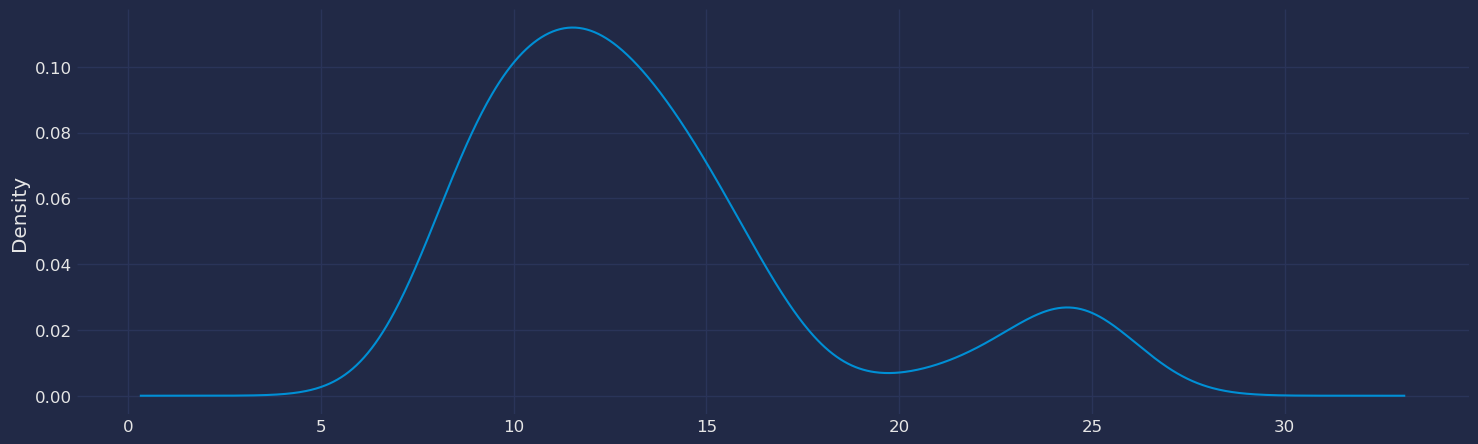

In [62]:
df["y"].plot(kind='kde',figsize = (16,5))
df["y"].describe()


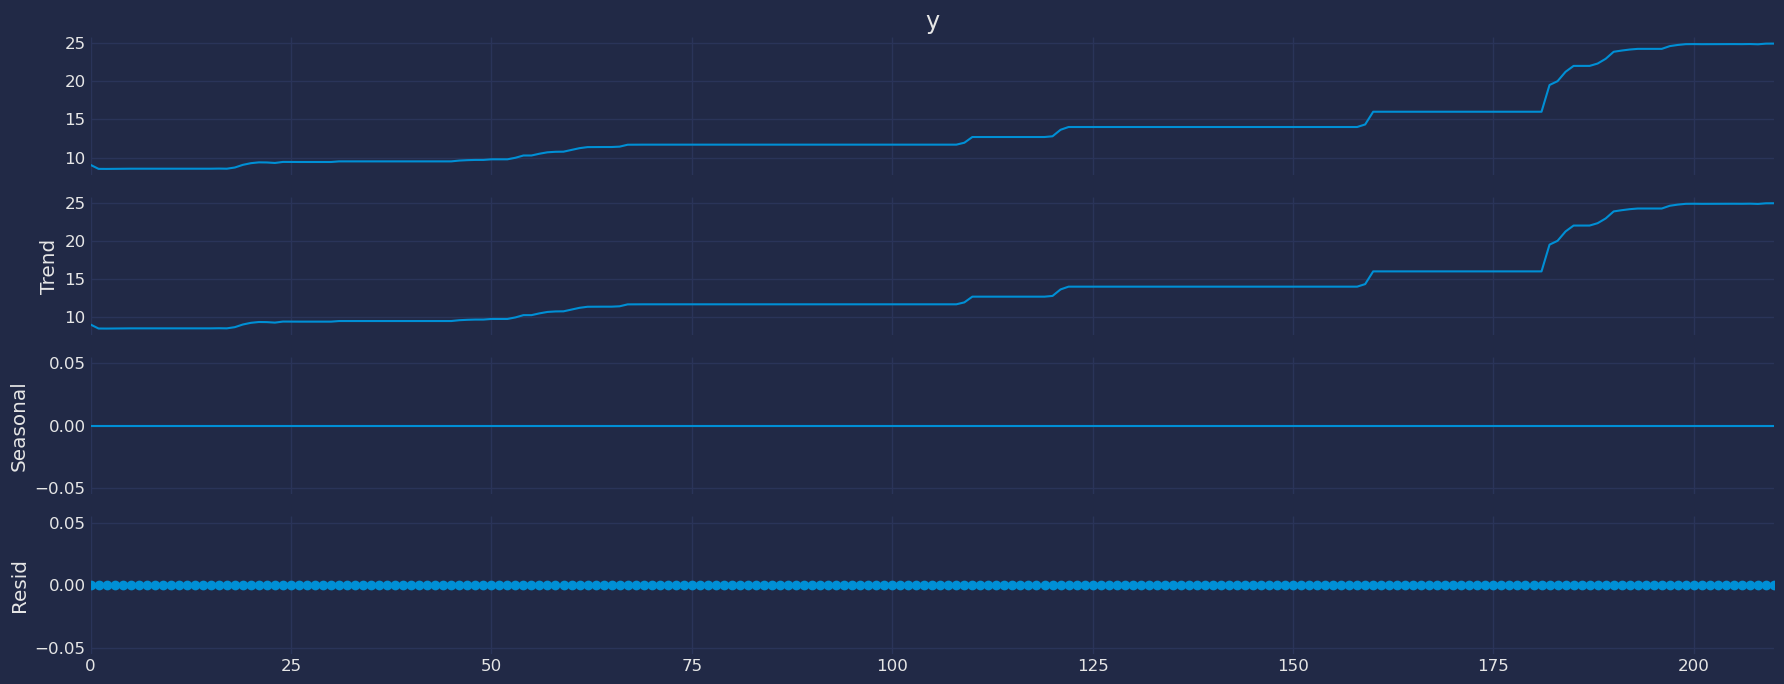

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed=seasonal_decompose(df["y"], model = "add", period=1)
decomposed.plot()
plt.show()


In [66]:
from statsmodels.tsa.stattools import adfuller

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")


In [ ]:
df1=df.copy()
df1['y_diff'] = df['y'].diff()
df1.dropna(inplace=True)
df1.head()

,ds,y,unique_id,y_diff
1,2007-02-01,8.519130,1,-0.523223
2,2007-03-01,8.512308,1,-0.006823
3,2007-04-01,8.523636,1,0.011329
4,2007-05-01,8.534783,1,0.011146
5,2007-06-01,8.540000,1,0.005217


In [78]:
df2=df.copy()
df2['y_diff'] = df['y'].diff().diff()
df2.dropna(inplace=True)
df2.head()

,ds,y,unique_id,y_diff
2,2007-03-01,8.512308,1,0.516400
3,2007-04-01,8.523636,1,0.018151
4,2007-05-01,8.534783,1,-0.000182
5,2007-06-01,8.540000,1,-0.005929
6,2007-07-01,8.540000,1,-0.005217


In [68]:
Augmented_Dickey_Fuller_Test_func(df1["y_diff"],"Life expectancy")

Dickey-Fuller test results for columns: Life expectancy
Test Statistic                -7.566620e+00
p-value                        2.914275e-11
No Lags Used                   1.000000e+00
Number of observations used    2.080000e+02
Critical Value (1%)           -3.462186e+00
Critical Value (5%)           -2.875538e+00
Critical Value (10%)          -2.574231e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


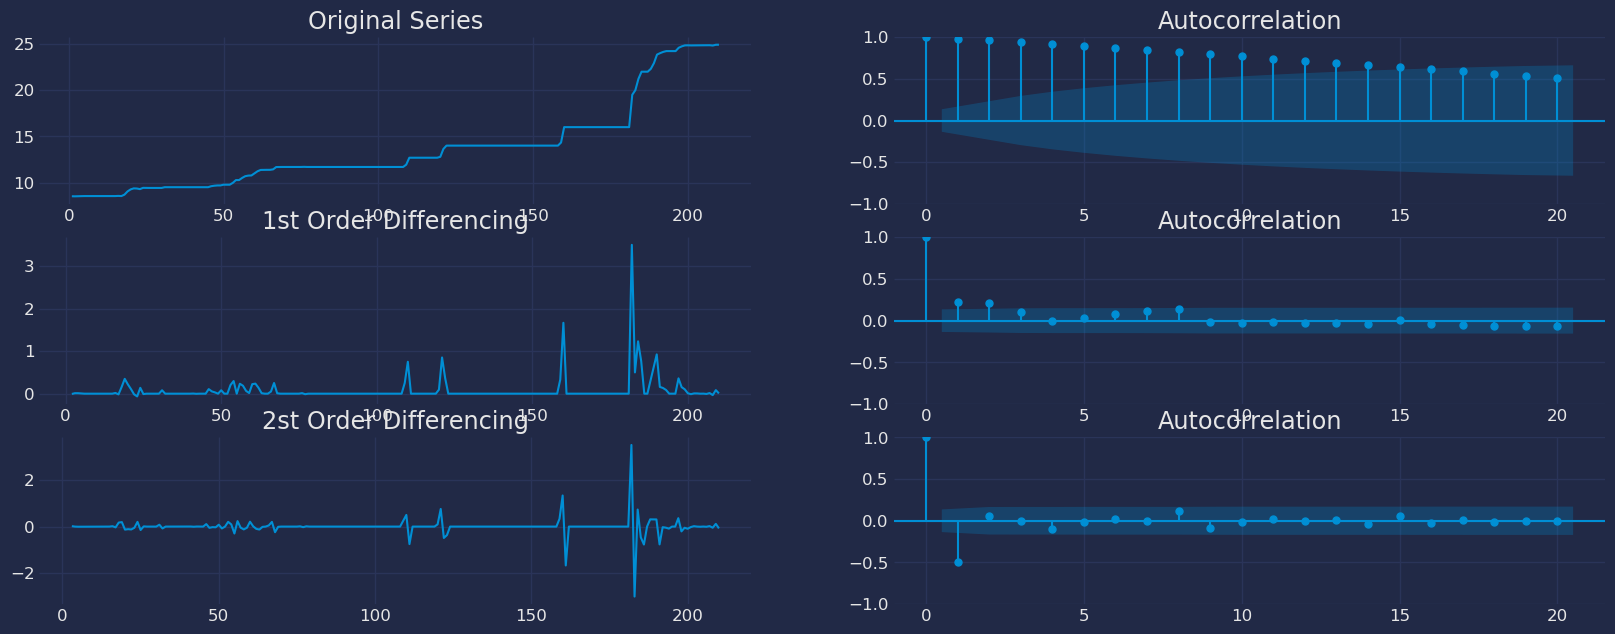

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 2, )
axes[0, 0].plot(df1["y"]); axes[0, 0].set_title('Original Series')
plot_acf(df1["y"], ax=axes[0, 1],lags=20)

axes[1, 0].plot(df1["y"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1["y"].diff().dropna(), ax=axes[1, 1],lags=20)

axes[2, 0].plot(df1["y"].diff().diff()); axes[2, 0].set_title('2st Order Differencing')
plot_acf(df1["y"].diff().diff().dropna(), ax=axes[2, 1],lags=20)


plt.show()

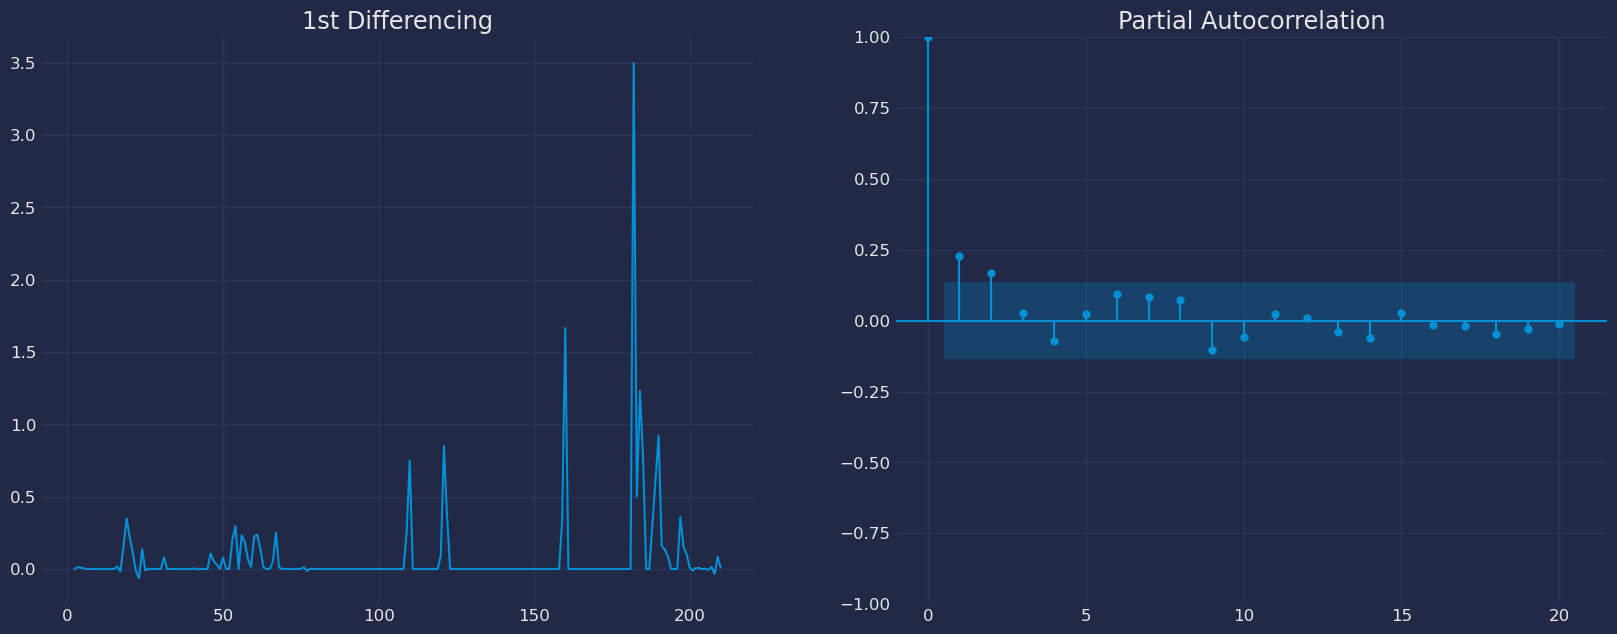

In [70]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1["y"].diff().dropna(), ax=axes[1],lags=20)

plt.show()


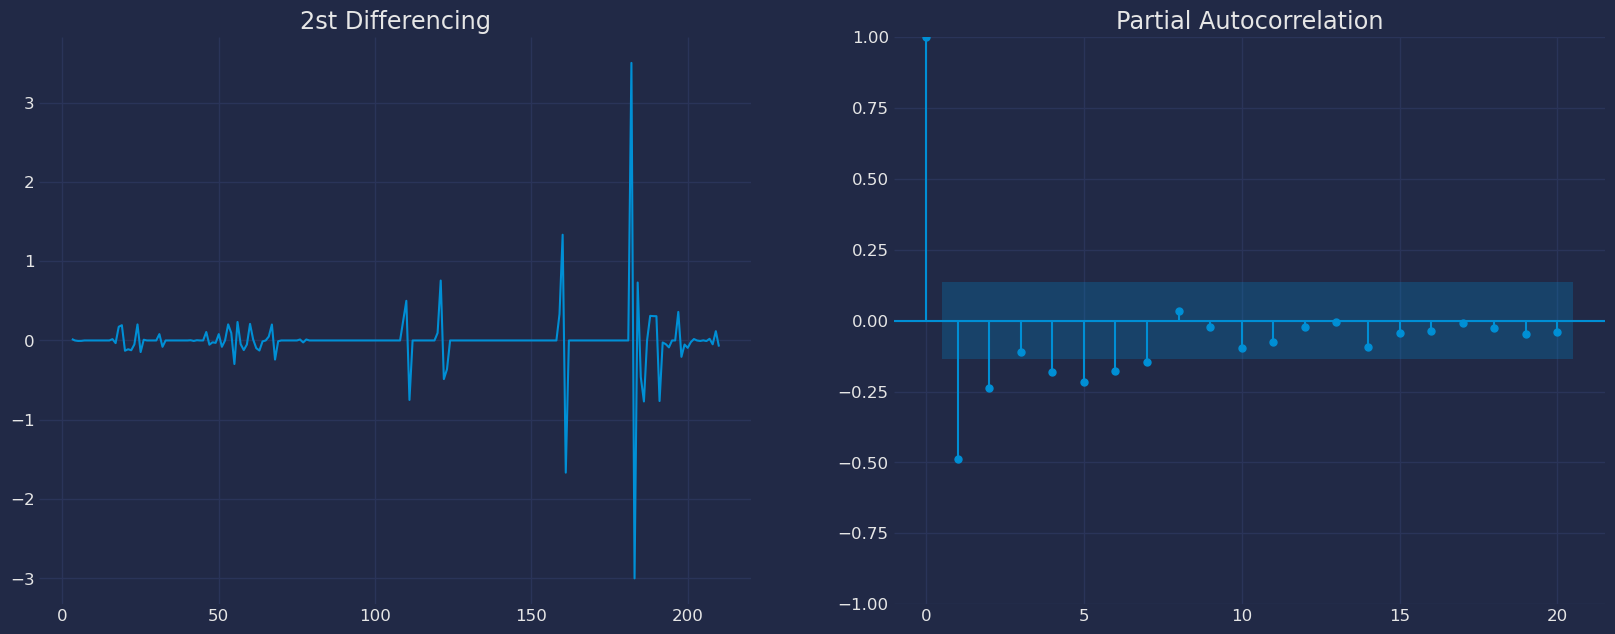

In [80]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1["y"].diff().diff().dropna(), ax=axes[1],lags=20)

plt.show()

In [ ]:
from statsforecast.models import ARIMA

arima = ARIMA(order=(1, 1, 1), season_length=1)

In [83]:
arima = arima.fit(y=df["y"].values)

In [86]:
y_hat_dict = arima.predict(h=horizon,)
y_hat_dict

{'mean': array([24.92932787, 24.93599542, 24.94076138, 24.94416809, 24.9466032 ,
        24.94834381, 24.949588  , 24.95047735, 24.95111305, 24.95156745,
        24.95189226, 24.95212443, 24.95229038, 24.95240901, 24.9524938 ,
        24.95255441, 24.95259773, 24.9526287 , 24.95265084])}

In [87]:
y_hat_dict2 = arima.predict(h=horizon,level=[95])
y_hat_dict2

{'mean': array([24.92932787, 24.93599542, 24.94076138, 24.94416809, 24.9466032 ,
        24.94834381, 24.949588  , 24.95047735, 24.95111305, 24.95156745,
        24.95189226, 24.95212443, 24.95229038, 24.95240901, 24.9524938 ,
        24.95255441, 24.95259773, 24.9526287 , 24.95265084]),
 'lo-95': 0     24.334617
 1     23.989928
 2     23.677848
 3     23.388325
 4     23.118317
 5     22.865873
 6     22.629260
 7     22.406854
 8     22.197146
 9     21.998765
 10    21.810487
 11    21.631224
 12    21.460028
 13    21.296065
 14    21.138613
 15    20.987039
 16    20.840794
 17    20.699398
 18    20.562431
 Name: 95%, dtype: float64,
 'hi-95': 0     25.524039
 1     25.882063
 2     26.203675
 3     26.500012
 4     26.774889
 5     27.030814
 6     27.269916
 7     27.494101
 8     27.705080
 9     27.904369
 10    28.093298
 11    28.273024
 12    28.444553
 13    28.608753
 14    28.766375
 15    28.918070
 16    29.064402
 17    29.205859
 18    29.342871
 Name: 95%, dtype: 

In [91]:
Y_hat_df=arima.forecast(y=df["y"].values, h=horizon, fitted=True)
Y_hat_df

{'mean': array([24.92932787, 24.93599542, 24.94076138, 24.94416809, 24.9466032 ,
        24.94834381, 24.949588  , 24.95047735, 24.95111305, 24.95156745,
        24.95189226, 24.95212443, 24.95229038, 24.95240901, 24.9524938 ,
        24.95255441, 24.95259773, 24.9526287 , 24.95265084]),
 'fitted': array([ 9.03331059,  9.01463039,  8.37089823,  8.44089078,  8.49234297,
         8.52249503,  8.53537022,  8.53778889,  8.53894397,  8.53949564,
         8.53975912,  8.53988495,  8.53994505,  8.53997376,  8.53998747,
         8.53999401,  8.53999714,  8.56061856,  8.53793418,  8.73220619,
         9.14448761,  9.36354604,  9.44544738,  9.38875611,  9.29173093,
         9.46155066,  9.4332466 ,  9.42632663,  9.42302162,  9.42144314,
         9.42068925,  9.42032919,  9.51913286,  9.50913792,  9.50436431,
         9.50208441,  9.50099552,  9.50047546,  9.50022708,  9.50010846,
         9.5000518 ,  9.50002474,  9.50381857,  9.49962438,  9.4998206 ,
         9.49991432,  9.49995908,  9.6319479

In [93]:
forecast=pd.Series(pd.date_range("2007-01-01", freq="ys", periods=horizon))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast


C:\Users\esteb\AppData\Local\Temp\ipykernel_18956\1365290511.py:1: FutureWarning: 'ys' is deprecated and will be removed in a future version, please use 'YS' instead.
  forecast=pd.Series(pd.date_range("2007-01-01", freq="ys", periods=horizon))


,ds
0,2007-01-01
1,2008-01-01
2,2009-01-01
3,2010-01-01
4,2011-01-01
5,2012-01-01
6,2013-01-01
7,2014-01-01
8,2015-01-01
9,2016-01-01


In [94]:
df=df.set_index("ds")

In [95]:
forecast["unique_id"]="1"
forecast["hat"]=y_hat_dict.get("mean")
forecast["lo-95"]=y_hat_dict2.get("lo-95")
forecast["hi-95"]=y_hat_dict2.get("hi-95")
forecast=forecast.set_index("ds")
forecast


,unique_id,hat,lo-95,hi-95
ds,,,,
2007-01-01,1,24.929328,24.334617,25.524039
2008-01-01,1,24.935995,23.989928,25.882063
2009-01-01,1,24.940761,23.677848,26.203675
2010-01-01,1,24.944168,23.388325,26.500012
2011-01-01,1,24.946603,23.118317,26.774889
2012-01-01,1,24.948344,22.865873,27.030814
2013-01-01,1,24.949588,22.629260,27.269916
2014-01-01,1,24.950477,22.406854,27.494101
2015-01-01,1,24.951113,22.197146,27.705080


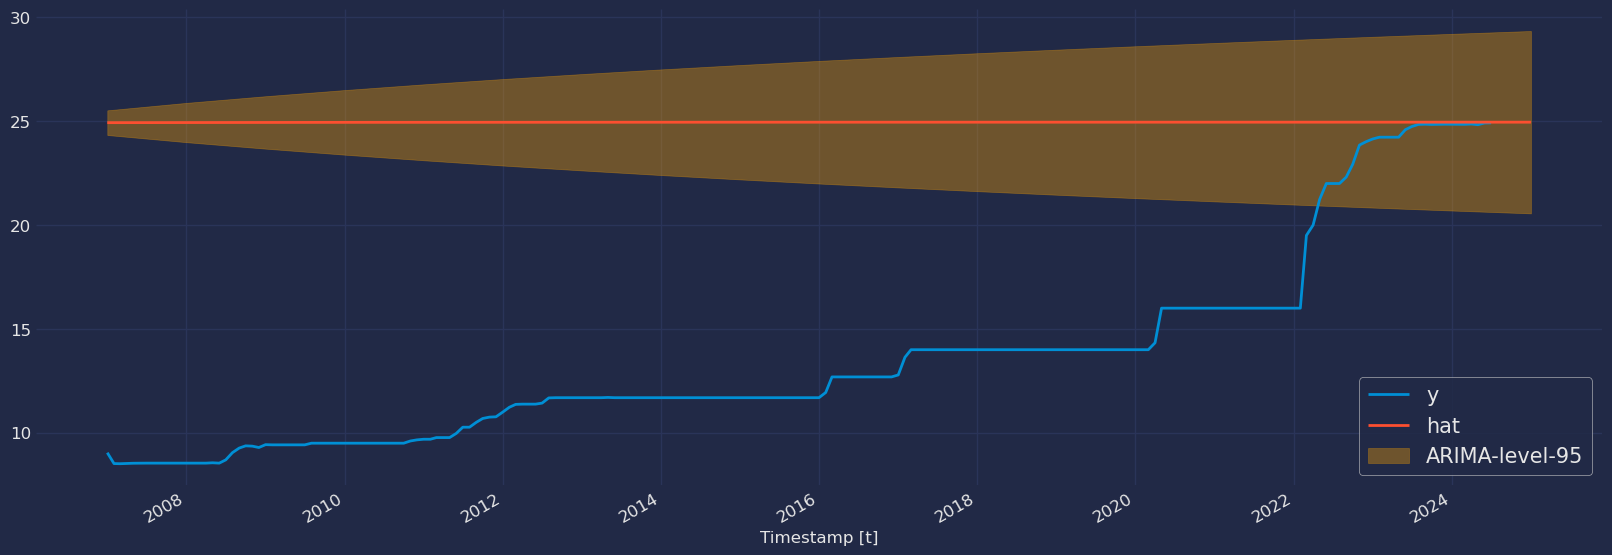

In [96]:
_, ax = plt.subplots(1, 1)
df_plot = pd.concat([df, forecast])
df_plot[['y', 'hat']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['lo-95'], 
                df_plot['hi-95'],
                alpha=.35,
                color='orange',
                label='ARIMA-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)


In [97]:
df.reset_index("ds", inplace=True)
Y_train_df = df[df.ds<='2023-01-01'] 
Y_test_df = df[df.ds>'2023-01-01'] 

Y_train_df.shape, Y_test_df.shape


((193, 3), (18, 3))

In [99]:
from sklearn import metrics

def model_evaluation(y_true, y_pred, Model):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {Model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')


In [ ]:
model_evaluation(Y_test_df["y"], forecast["hat"], "Arima")

Model Evaluation: Arima


ValueError: Found input variables with inconsistent numbers of samples: [18, 19]